In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
pwd()

'/kaggle/working'

In [5]:
df_train = pd.read_csv('../input/commonlitreadabilityprize/train.csv')
df_test = pd.read_csv('../input/commonlitreadabilityprize/test.csv')
df_sample = pd.read_csv('../input/commonlitreadabilityprize/sample_submission.csv')

In [6]:
df_train.head()

,id,url_legal,license,excerpt,target,standard_error
0,c12129c31,NaN,NaN,When the young people returned to the ballroom...,-0.340259,0.464009
1,85aa80a4c,NaN,NaN,"All through dinner time, Mrs. Fayre was somewh...",-0.315372,0.480805
2,b69ac6792,NaN,NaN,"As Roger had predicted, the snow departed as q...",-0.580118,0.476676
3,dd1000b26,NaN,NaN,And outside before the palace a great garden w...,-1.054013,0.450007
4,37c1b32fb,NaN,NaN,Once upon a time there were Three Bears who li...,0.247197,0.510845


In [7]:
df_test.head()

,id,url_legal,license,excerpt
0,c0f722661,NaN,NaN,My hope lay in Jack's promise that he would ke...
1,f0953f0a5,NaN,NaN,Dotty continued to go to Mrs. Gray's every nig...
2,0df072751,NaN,NaN,It was a bright and cheerful scene that greete...
3,04caf4e0c,https://en.wikipedia.org/wiki/Cell_division,CC BY-SA 3.0,Cell division is the process by which a parent...
4,0e63f8bea,https://en.wikipedia.org/wiki/Debugging,CC BY-SA 3.0,Debugging is the process of finding and resolv...


In [ ]:
df_sample.head()

In [9]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2834 entries, 0 to 2833
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              2834 non-null   object 
 1   url_legal       830 non-null    object 
 2   license         830 non-null    object 
 3   excerpt         2834 non-null   object 
 4   target          2834 non-null   float64
 5   standard_error  2834 non-null   float64
dtypes: float64(2), object(4)
memory usage: 133.0+ KB


In [10]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         7 non-null      object
 1   url_legal  3 non-null      object
 2   license    3 non-null      object
 3   excerpt    7 non-null      object
dtypes: object(4)
memory usage: 352.0+ bytes


In [13]:
df_train['excerpt'].iloc[1]

'All through dinner time, Mrs. Fayre was somewhat silent, her eyes resting on Dolly with a wistful, uncertain expression. She wanted to give the child the pleasure she craved, but she had hard work to bring herself to the point of overcoming her own objections.\nAt last, however, when the meal was nearly over, she smiled at her little daughter, and said, "All right, Dolly, you may go."\n"Oh, mother!" Dolly cried, overwhelmed with sudden delight. "Really?\nOh, I am so glad! Are you sure you\'re willing?"\n"I\'ve persuaded myself to be willing, against my will," returned Mrs. Fayre, whimsically. "I confess I just hate to have you go, but I can\'t bear to deprive you of the pleasure trip. And, as you say, it would also keep Dotty at home, and so, altogether, I think I shall have to give in."\n"Oh, you angel mother! You blessed lady! How good you are!" And Dolly flew around the table and gave her mother a hug that nearly suffocated her.'

In [14]:
import missingno as msno

<AxesSubplot:>

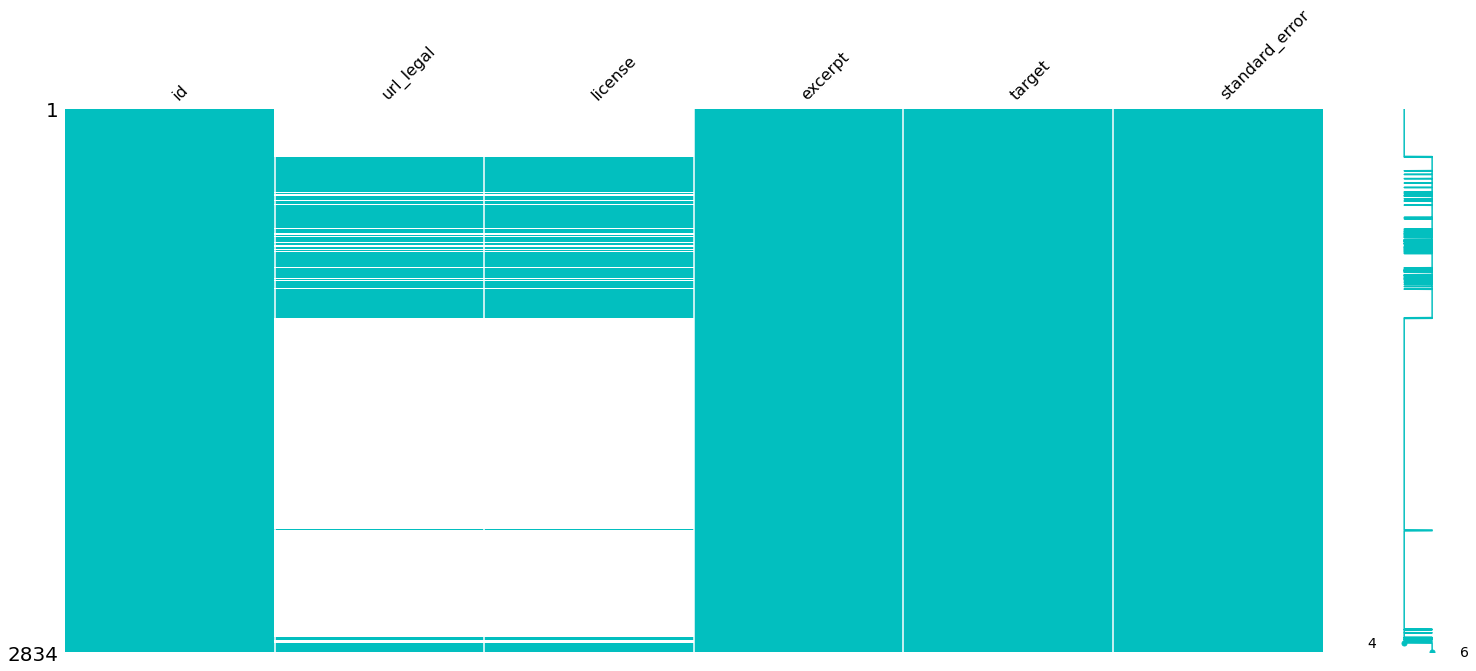

In [20]:
msno.matrix(df_train, color = (0.01, 0.75, 0.75))

In [21]:
df_train.head()

,id,url_legal,license,excerpt,target,standard_error
0,c12129c31,NaN,NaN,When the young people returned to the ballroom...,-0.340259,0.464009
1,85aa80a4c,NaN,NaN,"All through dinner time, Mrs. Fayre was somewh...",-0.315372,0.480805
2,b69ac6792,NaN,NaN,"As Roger had predicted, the snow departed as q...",-0.580118,0.476676
3,dd1000b26,NaN,NaN,And outside before the palace a great garden w...,-1.054013,0.450007
4,37c1b32fb,NaN,NaN,Once upon a time there were Three Bears who li...,0.247197,0.510845


In [24]:
df_train['excerpt_length'] = df_train.excerpt.apply(len)

In [28]:
df_train.head()

,id,url_legal,license,excerpt,target,standard_error,excerpt_length
0,c12129c31,NaN,NaN,When the young people returned to the ballroom...,-0.340259,0.464009,992
1,85aa80a4c,NaN,NaN,"All through dinner time, Mrs. Fayre was somewh...",-0.315372,0.480805,937
2,b69ac6792,NaN,NaN,"As Roger had predicted, the snow departed as q...",-0.580118,0.476676,908
3,dd1000b26,NaN,NaN,And outside before the palace a great garden w...,-1.054013,0.450007,909
4,37c1b32fb,NaN,NaN,Once upon a time there were Three Bears who li...,0.247197,0.510845,723


In [30]:
import plotly.express as px
from plotly import graph_objects as go

In [34]:
fig = px.box(y = 'excerpt_length', data_frame = df_train)
fig.show()

In [ ]:
print("The size of the training data is: {}".format(df_train.shape))
print("The size of the test data is: {}".format(df_test.shape))

In [ ]:
df_train.iloc[120]['excerpt']

In [ ]:
import re
import nltk
from nltk.corpus import stopwords

In [ ]:
def preprocess(df):
    preprocessed_text = []
    sentence = re.sub("[^a-zA-Z]", " ", sentence)
    sentence = sentence.lower()
    sentence = nltk.word_tokenize(sentence)
    sentence = [word for word in sentence if word not in set(stopwords.words("english"))]
    lemmatizer = nltk.wordnetLemmatizer()
    lemmatizer.lemmatize(sen)
    
    